In [1]:
import requests

In [2]:
# Endpoint Home
response = requests.get('http://127.0.0.1:5000/')
print(response.json())

{'endpoints': {'clasificacion': {'predict_get': 'GET /clasificacion/predict?id=<id>', 'predict_post': 'POST /clasificacion/predict (Body: image)', 'predict_random': 'GET /clasificacion/predict/random'}, 'history': 'GET /history (Query: type, limit)', 'segmentacion': {'predict_get': 'GET /segmentacion/predict?id=<id>', 'predict_post': 'POST /segmentacion/predict (Body: image)', 'predict_random': 'GET /segmentacion/predict/random'}}, 'models': {'clasificacion': True, 'segmentacion': True}, 'status': 'online'}


In [4]:
# Endpoint clasificación predict post (envio de imagen)

image_path = r"..\Mini_base_datos\TCGA_CS_4941_19960909_14.tif"

with open(image_path, 'rb') as f:
    response = requests.post(
        'http://127.0.0.1:5000/clasificacion/predict',
        files={'image': (image_path, f, 'image/tiff')}
    )

print(response.json())

{'confidence': '100.00%', 'prediction_id': 4, 'prediction_label': 'Detectado(1)', 'success': True}


In [7]:
# ENdpoint clasificacion get (consultamos la imagen)

response = requests.get('http://127.0.0.1:5000/clasificacion/predict?id=4')
print(response.json())

{'confidence': '100.00%', 'date': '2025-12-09T08:14:05.249611', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 4, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}


In [6]:
# Endpoint Clasificacion predict random

response = requests.get('http://127.0.0.1:5000/clasificacion/predict/random')
print(response.json())

{'confidence': '100.00%', 'filename': 'TCGA_CS_4941_19960909_7.tif', 'prediction_label': 'No detectado (0)'}


{'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'mask_base64': '', 'segmentation_id': 7, 'success': True}

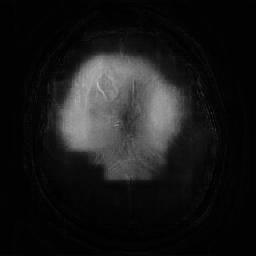

In [12]:
# Endpoint segmentacion predict post

image_path = r"..\Mini_base_datos\TCGA_CS_4941_19960909_14.tif"

with open(image_path, 'rb') as f:
    response = requests.post(
        'http://127.0.0.1:5000/segmentacion/predict',
        files={'image': (image_path, f, 'image/tiff')}
    )

print(response.json())

{'date': '2025-12-09T08:27:57.207086', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 7, 'mask_base64': '', 'type': 'segmentacion'}

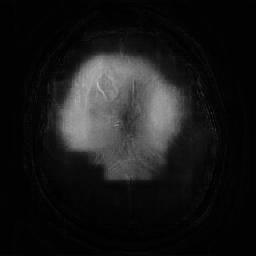

In [13]:
# Endpoint segmentación get

response = requests.get('http://127.0.0.1:5000/segmentacion/predict?id=7')
print(response.json())

{'filename': 'TCGA_CS_4941_19960909_9.tif', 'mask_base64': ''}

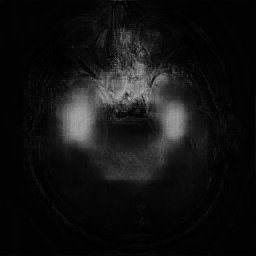

In [14]:
# Endpoint segmentación predict random


response = requests.get('http://127.0.0.1:5000/segmentacion/predict/random')
print(response.json())

{'count': 7, 'data': [{'date': '2025-12-09T08:27:57.207086', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 7, 'mask_base64': '', 'type': 'segmentacion'}, {'date': '2025-12-09T08:26:29.867455', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_1.tif', 'id': 6, 'mask_base64': '', 'type': 'segmentacion'}, {'date': '2025-12-09T08:25:35.347713', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_1.tif', 'id': 5, 'mask_base64': '', 'type': 'segmentacion'}, {'confidence': '100.00%', 'date': '2025-12-09T08:14:05.249611', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 4, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}, {'confidence': '100.00%', 'date': '2025-12-09T08:13:14.883849', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 3, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}, {'confidence': '100.00%', 'date': '2025-12-08T23:09:23.598079', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_
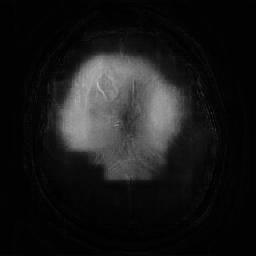
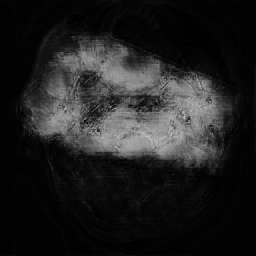
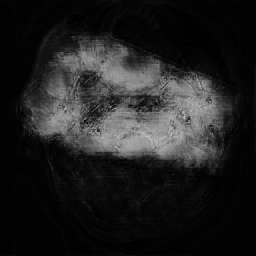

In [15]:
# Endpoint history completa 
response = requests.get('http://127.0.0.1:5000/history')
print(response.json())


In [16]:
# Endpoint history clasificación

response = requests.get('http://127.0.0.1:5000/history?type=clasificacion')
print(response.json())

{'count': 4, 'data': [{'confidence': '100.00%', 'date': '2025-12-09T08:14:05.249611', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 4, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}, {'confidence': '100.00%', 'date': '2025-12-09T08:13:14.883849', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 3, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}, {'confidence': '100.00%', 'date': '2025-12-08T23:09:23.598079', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 2, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}, {'confidence': '100.00%', 'date': '2025-12-08T23:09:04.796112', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_1.tif', 'id': 1, 'predicted_class': 'No detectado (0)', 'type': 'clasificacion'}]}


{'count': 3, 'data': [{'date': '2025-12-09T08:27:57.207086', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 7, 'mask_base64': '', 'type': 'segmentacion'}, {'date': '2025-12-09T08:26:29.867455', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_1.tif', 'id': 6, 'mask_base64': '', 'type': 'segmentacion'}, {'date': '2025-12-09T08:25:35.347713', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_1.tif', 'id': 5, 'mask_base64': '', 'type': 'segmentacion'}]}

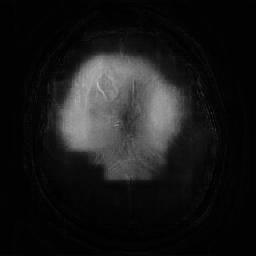
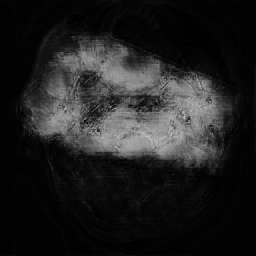
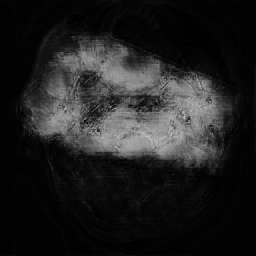

In [17]:
# Endpoint history segmentación
response = requests.get('http://127.0.0.1:5000/history?type=segmentacion')
print(response.json())
